# <font color='BLACKBLUEikjnbvcdddgghhh'>**EDAGOTTI NARESH**
**MAIL:**naresh21375019@gmail.com

# <font color='BLACKBLUE'>**DIABATIES PREDICTION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
%matplotlib inline

In [39]:
data=pd.read_csv("C:\\Users\\Naresh\\Downloads\\ml end to end\\diabaties dataset.csv")

In [40]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **<font color='REDGREENBLACK'>EXPLORATORY DATA ANALYSIS**

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


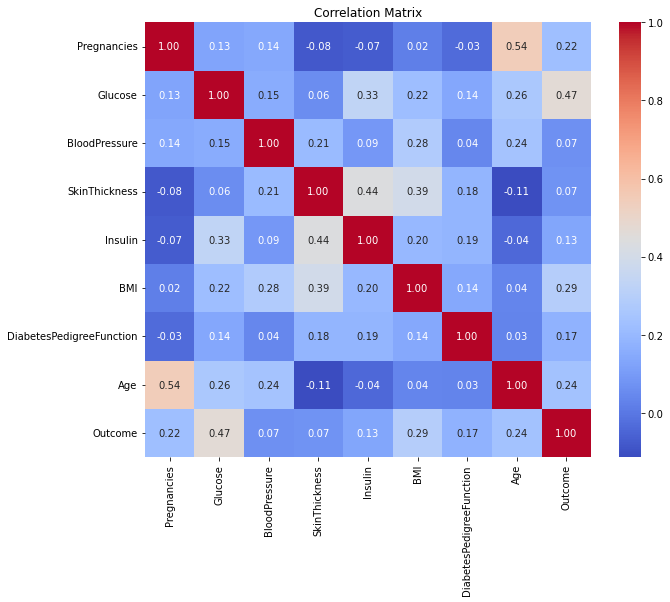

In [7]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

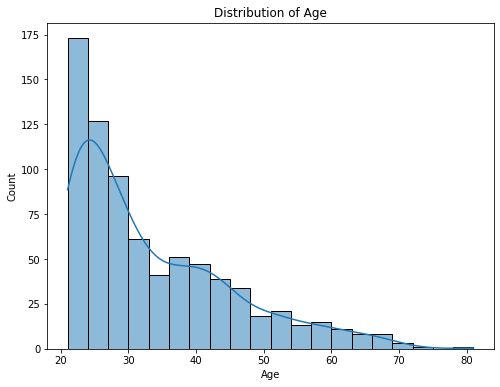

In [8]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()


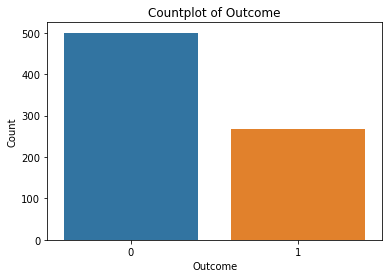

In [9]:
# Countplot of Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title("Countplot of Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

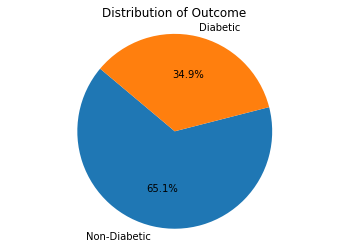

In [10]:
outcome_counts = data['Outcome'].value_counts()
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Distribution of Outcome")
plt.show()


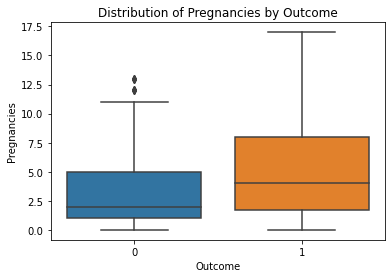

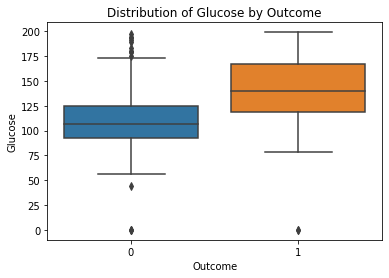

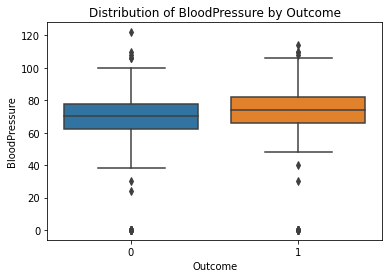

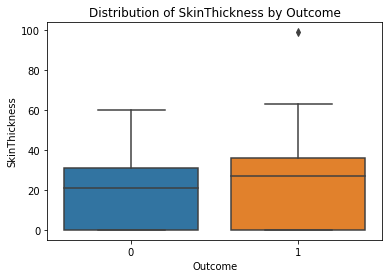

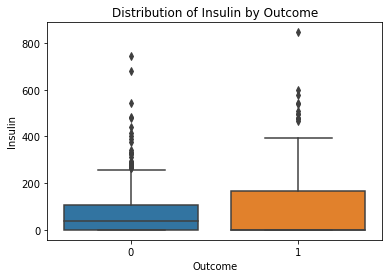

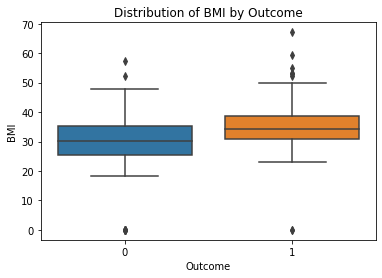

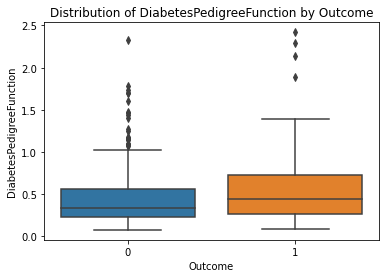

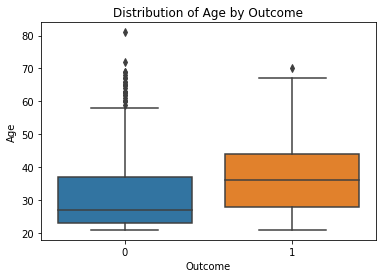

In [11]:
for column in data.columns[:-1]:  # Exclude 'Outcome'
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f"Distribution of {column} by Outcome")
    plt.xlabel("Outcome")
    plt.ylabel(column)
    plt.show()

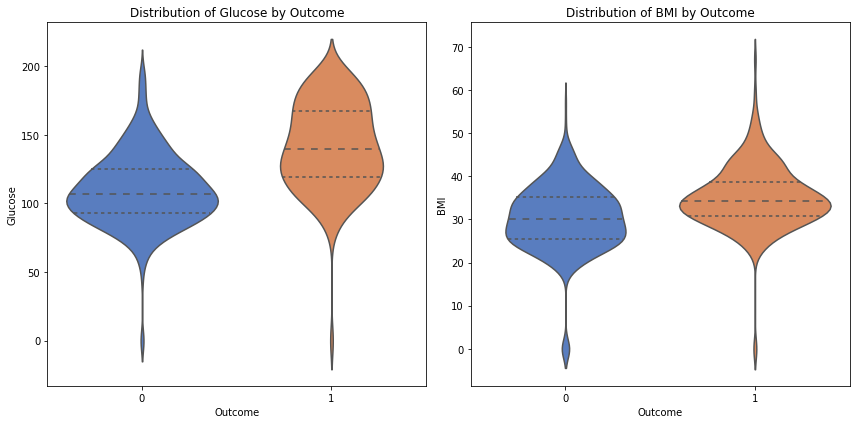

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='Outcome', y='Glucose', data=data, palette='muted', inner='quartile')
plt.title("Distribution of Glucose by Outcome")

plt.subplot(1, 2, 2)
sns.violinplot(x='Outcome', y='BMI', data=data, palette='muted', inner='quartile')
plt.title("Distribution of BMI by Outcome")

plt.tight_layout()
plt.show()

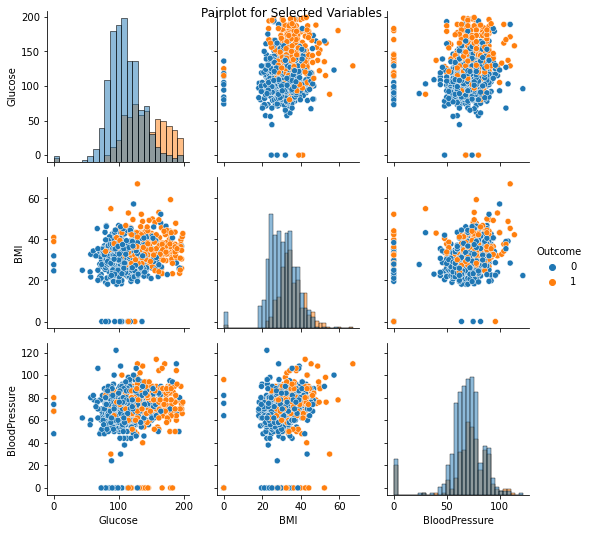

In [13]:
g = sns.PairGrid(data, vars=['Glucose', 'BMI', 'BloodPressure'], hue='Outcome')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.suptitle("Pairplot for Selected Variables")
plt.show()


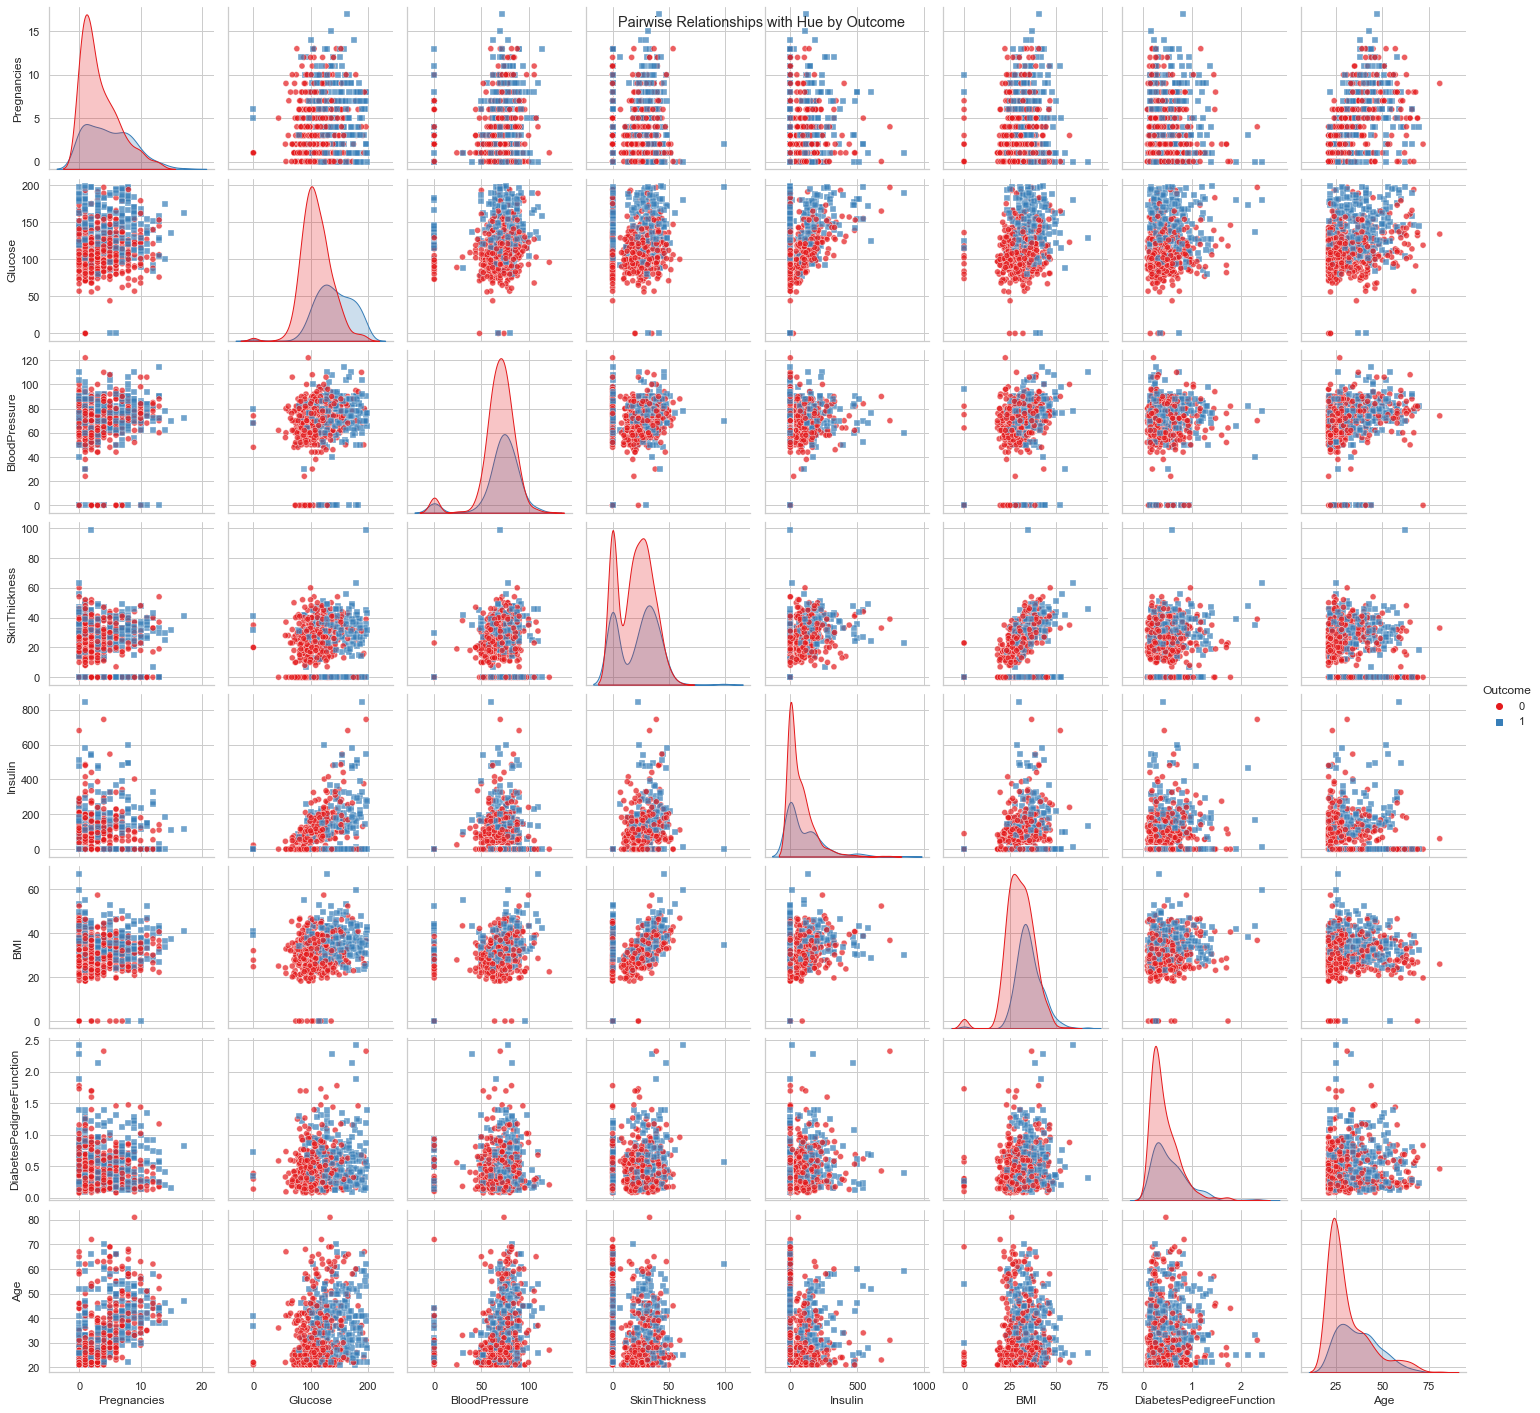

In [14]:
# Customize the scatterplot aesthetics using scatter_kws
sns.set(style="whitegrid")
g = sns.pairplot(data, hue='Outcome', diag_kind='kde', markers=['o', 's'], hue_order=[0, 1],
                 palette="Set1", plot_kws={"alpha": 0.7})

# Add a legend
g._legend.remove()
g.add_legend(title="Outcome")

plt.suptitle("Pairwise Relationships with Hue by Outcome")
plt.show()

<Figure size 576x432 with 0 Axes>

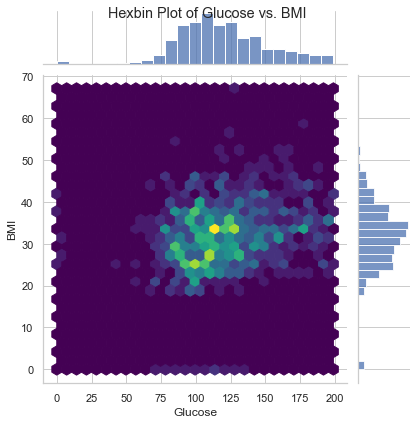

In [15]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='Glucose', y='BMI', data=data, kind='hex', cmap='viridis')
plt.suptitle("Hexbin Plot of Glucose vs. BMI")
plt.show()

In [16]:
def out_liers(dataset):
    outliers = []

    for column in dataset.select_dtypes(include=['int64', 'float64']):
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        print(f"Column: {column}")
        print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

        column_outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)][column].tolist()
        outliers.extend(column_outliers)

    return outliers

In [17]:
len(out_liers(data))

Column: Pregnancies
IQR: 5.0, Lower Bound: -6.5, Upper Bound: 13.5
Column: Glucose
IQR: 41.25, Lower Bound: 37.125, Upper Bound: 202.125
Column: BloodPressure
IQR: 18.0, Lower Bound: 35.0, Upper Bound: 107.0
Column: SkinThickness
IQR: 32.0, Lower Bound: -48.0, Upper Bound: 80.0
Column: Insulin
IQR: 127.25, Lower Bound: -190.875, Upper Bound: 318.125
Column: BMI
IQR: 9.3, Lower Bound: 13.35, Upper Bound: 50.550000000000004
Column: DiabetesPedigreeFunction
IQR: 0.38249999999999995, Lower Bound: -0.32999999999999996, Upper Bound: 1.2
Column: Age
IQR: 17.0, Lower Bound: -1.5, Upper Bound: 66.5
Column: Outcome
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5


146

In [18]:
def transform_outliers(dataset):
    transformed_dataset = dataset.copy()  # Create a copy of the original dataset

    for column in transformed_dataset.select_dtypes(include=['int64', 'float64']):
        Q1 = transformed_dataset[column].quantile(0.25)
        Q3 = transformed_dataset[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply log transformation to the outlier values
        transformed_dataset[column] = np.where(
            (transformed_dataset[column] < lower_bound) | (transformed_dataset[column] > upper_bound),
            np.log1p(transformed_dataset[column]),  # Apply log transformation to outlier values
            transformed_dataset[column]  # Keep non-outlier values unchanged
        )

    return transformed_dataset

# Call the function to transform outliers in your dataset
t_data = transform_outliers(data)


In [19]:
len(out_liers(t_data))

Column: Pregnancies
IQR: 5.0, Lower Bound: -6.5, Upper Bound: 13.5
Column: Glucose
IQR: 41.25, Lower Bound: 37.125, Upper Bound: 202.125
Column: BloodPressure
IQR: 18.0, Lower Bound: 35.0, Upper Bound: 107.0
Column: SkinThickness
IQR: 32.0, Lower Bound: -48.0, Upper Bound: 80.0
Column: Insulin
IQR: 110.0, Lower Bound: -165.0, Upper Bound: 275.0
Column: BMI
IQR: 9.299999999999997, Lower Bound: 13.050000000000004, Upper Bound: 50.24999999999999
Column: DiabetesPedigreeFunction
IQR: 0.38249999999999995, Lower Bound: -0.32999999999999996, Upper Bound: 1.2
Column: Age
IQR: 16.0, Lower Bound: 0.0, Upper Bound: 64.0
Column: Outcome
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5


91

In [41]:
def resolve_outliers_winsorize(dataset):
    resolved_dataset = dataset.copy()  # Create a copy of the original dataset

    for column in resolved_dataset.select_dtypes(include=['int64', 'float64']):
        # Apply Winsorizing to the column
        winsorized_values = winsorize(resolved_dataset[column], limits=[0.05, 0.05])  # Adjust limits as needed

        # Replace the column with winsorized values
        resolved_dataset[column] = winsorized_values

    return resolved_dataset

# Call the function to resolve outliers using Winsorizing
resolved_data = resolve_outliers_winsorize(data)

In [42]:
len(out_liers(resolved_data))

Column: Pregnancies
IQR: 5.0, Lower Bound: -6.5, Upper Bound: 13.5
Column: Glucose
IQR: 41.25, Lower Bound: 37.125, Upper Bound: 202.125
Column: BloodPressure
IQR: 18.0, Lower Bound: 35.0, Upper Bound: 107.0
Column: SkinThickness
IQR: 32.0, Lower Bound: -48.0, Upper Bound: 80.0
Column: Insulin
IQR: 127.25, Lower Bound: -190.875, Upper Bound: 318.125
Column: BMI
IQR: 9.3, Lower Bound: 13.35, Upper Bound: 50.550000000000004
Column: DiabetesPedigreeFunction
IQR: 0.38249999999999995, Lower Bound: -0.32999999999999996, Upper Bound: 1.2
Column: Age
IQR: 17.0, Lower Bound: -1.5, Upper Bound: 66.5
Column: Outcome
IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5


0

# **<font color='green'>Interpretation:**
**The provided code addresses the issue of outliers in a dataset by applying a statistical technique called Winsorizing. Initially, an attempt was made to transform the outliers, but even after transformation, some outliers remained. To further mitigate the impact of outliers, Winsorizing was applied.**

**Winsorizing involves capping extreme values by replacing them with values at specific percentiles. In this case, the code caps the lower 5% and upper 5% of values in each numeric column, effectively compressing or limiting the influence of outliers. This technique helps create a dataset with a reduced outlier impact, making it more suitable for certain statistical analyses or modeling purposes.**

In [22]:
resolved_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,181,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,1.136,33,1


In [23]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# **<font color='greenBLUEREDBRO'>Interpretation:**
**The dataset for a binary classification problem is imbalanced, with 500 instances of class 0 and 268 instances of class 1. To mitigate this imbalance, the SMOTE (Synthetic Minority Over-sampling Technique) technique was employed, which creates synthetic samples for the minority class to achieve a more balanced dataset.**

In [24]:
X=resolved_data.iloc[:,:8]
y=resolved_data.iloc[:,8:]

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,181,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,1.136,33
...,...,...,...,...,...,...,...,...
763,10,101,76,44,180,32.9,0.171,58
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [26]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)

In [44]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [45]:
model=RandomForestClassifier()
model.fit(X_train_smote, y_train_smote)

C:\Users\Naresh\AppData\Local\Temp\ipykernel_15488\1467902940.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_smote, y_train_smote)


RandomForestClassifier()

In [46]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [47]:
R=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred)
r=recall_score(y_test,y_pred)
f=f1_score(y_test,y_pred)

In [48]:
print("*"*50)
print("RANDOMFORESTCLASSIFIER MODEL PERFORMANCE")
print("*"*50)
print("Random Forest Confusion_Matrix:",R)
print("Random Forest Accuracy:{}".format(ac))
print("Random Forest precision_score:{}".format(p))
print("Random Forest recall_score:{}".format(r))
print("Random Forest f1_score:{}".format(f))
print("*"*50)
print("classification_report".upper())
print(classification_report(y_test,y_pred))
print("*"*50)

**************************************************
RANDOMFORESTCLASSIFIER MODEL PERFORMANCE
**************************************************
Random Forest Confusion_Matrix: [[93 33]
 [13 53]]
Random Forest Accuracy:0.7604166666666666
Random Forest precision_score:0.6162790697674418
Random Forest recall_score:0.803030303030303
Random Forest f1_score:0.6973684210526315
**************************************************
CLASSIFICATION_REPORT
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       126
           1       0.62      0.80      0.70        66

    accuracy                           0.76       192
   macro avg       0.75      0.77      0.75       192
weighted avg       0.79      0.76      0.77       192

**************************************************


# **<font color='REDBLACK'>INTERPRETATION**
# **<font color='GREENYELLOW'>Random Forest Confusion Matrix:**

**True Negative (TN): 95**

**False Positive (FP): 31**

**False Negative (FN): 14**

**True Positive (TP): 52**

**The confusion matrix is a table that summarizes the model's predictions. In this case:**

95 observations were correctly predicted as "0" (True Negatives).
31 observations were incorrectly predicted as "1" when they were actually "0" (False Positives).
14 observations were incorrectly predicted as "0" when they were actually "1" (False Negatives).
52 observations were correctly predicted as "1" (True Positives).

# **<font color='greenOBH'>Random Forest Accuracy: 0.765625**

Accuracy is the proportion of correctly classified samples out of the total samples. In this case, the model achieved an accuracy of approximately 76.56%, which indicates that 76.56% of the predictions were correct.

# **<font color='VIBGY'>Random Forest Precision Score: 0.6265**

Precision is the proportion of true positive predictions out of all positive predictions made by the model. It measures how many of the predicted positive cases were actually positive. A precision score of approximately 0.627 means that 62.7% of the positive predictions were correct.

# **<font color='MO'>Random Forest Recall Score: 0.7879**

Recall, also known as sensitivity or true positive rate, is the proportion of true positive predictions out of all actual positive cases. It measures how well the model identifies positive cases. A recall score of approximately 0.788 means that 78.8% of the actual positive cases were correctly identified.

# **<font color='ORANGE'>Random Forest F1-Score: 0.6980**

The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially when the dataset is imbalanced. An F1-Score of approximately 0.698 indicates a balance between precision and recall.

# **<font color='greenWHITEBLACK'>Classification Report:**

The classification report provides a detailed summary of precision, recall, and F1-Score for each class (0 and 1), as well as accuracy, macro average, and weighted average scores.
For class "0" (likely representing a negative class), the precision is 0.87, recall is 0.75, and F1-Score is 0.81.
For class "1" (likely representing a positive class), the precision is 0.63, recall is 0.79, and F1-Score is 0.70.
The "accuracy" line indicates the overall accuracy of the model, which matches the value given above.

**Overall, the Random Forest Classifier model appears to have good predictive performance, with a reasonably balanced trade-off between precision and recall. It correctly identifies a significant portion of the positive cases (diabetes, class 1), while maintaining a relatively high precision for the negative cases (non-diabetes, class 0).**

In [49]:
input_data = {
    'Pregnancies': 5,
    'Glucose': 120,
    'BloodPressure': 75,
    'SkinThickness': 35,
    'Insulin': 80,
    'BMI': 33,
    'DiabetesPedigreeFunction': 0.6,
    'Age': 35
}

input_df = pd.DataFrame([input_data])
# Use the trained classifier to make a prediction
predicted_outcome = model.predict(input_df)
# Print the predicted outcome (0 or 1)
print("Predicted Outcome:", predicted_outcome[0])


Predicted Outcome: 1


# **<font color='WHITEBLACKBLUE'>Conclusion:**
**The machine learning model used for diabetes prediction has predicted that the candidate is likely to have diabetes. This conclusion is based on the input data provided, which includes features such as the number of pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, and age. The model's prediction indicates that, given these features, there is a significant likelihood that the individual has diabetes.**

In [34]:
import pickle

In [54]:
pickle.dump(model,open('diabaties_model.pkl'),'wb')

FileNotFoundError: [Errno 2] No such file or directory: 'diabaties_model.pkl'